

<CENTER>
<div style=width:500px;border-radius:10px;height:220px;background-color:#ffcccc;
     text-align:center;vertical-align:middle;>
<br>
<CENTER>
<font size=7, font color=navy> Méthodes numériques
</CENTER>
    <br>
<CENTER>
<font size=6, font color=navy> Equations algébriques
</CENTER>
</div>
</CENTER>


# RESOLUTION DE SYSTEMES LINEAIRES 
# APPLICATIONS ET GENERALISATIONS 

# POSITION DU PROBLEME

On fixe $(p,n)\in (\mathbb{N}^\star)^2$


Système linéaire de $n$ équations à $p$ inconnues (à coefficients dans $\mathbb{K}$) :

$$
\mathcal{S}\colon \quad\left\{
\begin{array}{ccccccc}
a_{1,1}x_1&+&\ldots &+&a_{1,p}x_p&=&b_1\\
a_{2,1}x_1&+&\ldots &+&a_{2,n}x_p&=&b_2\\
\vdots &&\vdots &&\vdots &&\vdots \\
a_{n,1}x_1&+&\ldots &+&a_{n,p}x_p&=&b_n
\end{array} \right.
$$

* Matrice $A=\begin{pmatrix}
a_{1,1}&\ldots &a_{1,p}\\
\vdots &\ddots &\vdots \\
a_{n,1}&\ldots &a_{n,p}
\end{pmatrix}$
* Colonne second membre ${\begin{pmatrix}b_1&\ldots &b_n\end{pmatrix}}^T$
* Matrice augmentée $(A|B)$

### Opérations élémentaires

* Permuter : $L_i \leftrightarrow L_j$ ($j\neq i$)
* Dilater : $L_i \leftarrow \lambda L_i$ ($\lambda \neq 0$)
* Pivoter $L_i\leftarrow L_i+\alpha L_j$ ($j\neq i$)

Opérations réversibles $\rightarrow$ ne changent pas l'ensemble solution (Gauss)!     

Principe : opération élémentaires $\rightarrow$ système plus simple : <b>échelonnée</b>


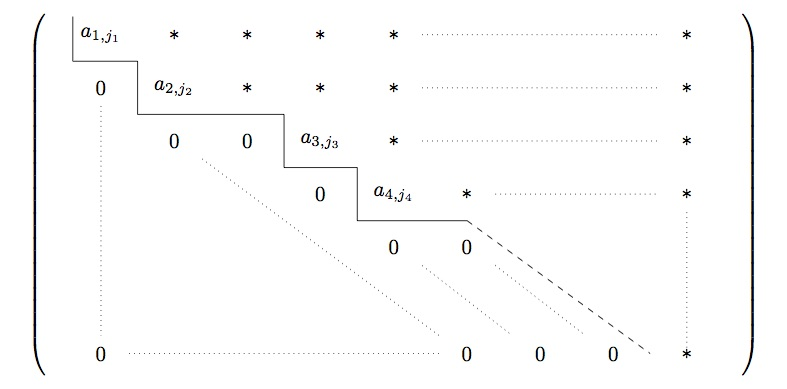

In [3]:
from IPython.display import Image,display
i = Image(filename='matechelonnee.jpg')
display(i)

$\forall i \in [\!| 1,n+1|\!]$ :
* $\forall j\in [\!| 1,j_i-1|\!]$, $a_{i,j}=0$.
* $j_{i+1}\geq j_i+1$
* par convention $a_{i,j}=0$ si $i>n$ ou $j>p$.

# REDUCTION DE GAUSS-JORDAN

### Algorithme de Gauss

<b>Successivement</b>

* Colonne nulle $\rightarrow$ on la passe.
* Recherche de pivot $\leftrightarrow$ $a_{i_0,j}\neq 0$
* Echange $\rightarrow$ $L_{i_0}$ en tête de sous-système
* Elimination des termes de la colonne $L_{i}\leftarrow L_i-\alpha_i L_{i_0}$
* $\rightarrow$ on passe désormais la ligne et la colonne

<i>... Tant qu'il reste des lignes/colonnes </i>

### Implémentation

* Système : pas adapté $\rightarrow$ version matricielle
* Matrices : 
    * Listes de listes
    * Array numpy
    * Matrix numpy    
    $\rightarrow$ de float ou int
* Entrée :
    * Unique matrice    
    $\rightarrow$ du système    
    $\rightarrow$ matrice augmentée
    * Couple matrice/colonne

### Fonctions auxiliaires

* echange(A,i,j)
* transvection(A,i,j,alpha)
* dilatation(A,i,lambda)
* recherchepivot(A,i,j)
* augmente(A,B)

In [ ]:
# A vous

In [2]:
def echange(A,i,j):
    """echange les ligne i et j"""
    A[i],A[j]=A[j],A[i]
    
def transvection(A,i,j,alpha):
    """ajoute alpha*L_j à L_i"""
    p=len(A[0])
    for k in range(p):
        A[i][k]=A[i][k]+alpha*A[j][k]

def dilatation(A,i,alpha):
    """multiplie la ligne i par alpha"""
    p=len(A[0])
    for k in range(p):
        A[i][k]=alpha*A[i][k]

In [1]:
def recherche_pivot(A,i,j):
    """recherche l'indice du premier pivot non nul 
    à partir de la ieme ligne dans la jeme colonne"""
    n=len(A)
    k=i
    candidat=A[i][j]
    while k<n-1 and candidat==0:
        k+=1
        candidat=A[k][j]
    if candidat==0:
        return (k,False)#booleen : colonne nulle !
    else:
        return (k,True)

In [3]:
def augmente(A,B):
    assert len(A)==len(B)#test : même nombre de lignes
    n=len(A)
    res=[]
    for k in range(n):
        res.append(A[k]+B[k])#Concaténation des lignes
    return res

### Fonction finale

* Sortie : 
    * Nouvelle matrice (faire une vraie copie)
    * Echelonnee
* Préliminaire : fonction d'augmentation

In [ ]:
# A vous


In [6]:
def gauss(A):
    """renvoie la matrice résultant de l'application de l'algorithme de Gauss-Jordan
    à partir de A de taille nXp"""
    M=[ligne[:] for ligne in A]#Copie véritable
    n=len(M)#Nombre de lignes
    p=len(M[0])#Nombre de colonnes
    iligne=0
    icolonne=0
    while iligne<n and icolonne<p:#Condition de sortie
        k,test=recherche_pivot(M,iligne,icolonne)
        if test:#On pivote si on trouve un pivot
            if k!=iligne:
                echange(M,iligne,k)#Placement du pivot
            for i in range(iligne+1,n):#Pivotage/Elimination
                transvection(M,i,iligne,M[i][icolonne]*(-1.)/M[iligne][icolonne])#Division flottante
            iligne+=1#Si on a pivoté
        icolonne+=1#Toujours
    return M

In [13]:
def gauss(B):
    """Entrée : matrice du système"""
    n=len(B)
    p=len(B[0])
    A=[B[i][:] for i in range(n)]#copie de la matrice
    iligne=0
    icolonne=0
    while icolonne<p and iligne<n:#conditions d'arrêt du parcours
        (k,test)=recherche_pivot(A,iligne,icolonne)
        if test:#S'il y a un pivot, on pivote
            echange(A,k,iligne)#Place le pivot où il faut
            for l in range(iligne+1,n):#Action sur les lignes du dessous
                transvection(A,l,iligne,-A[l][icolonne]/float(A[iligne][icolonne]))#Pivotage/Elimination
                #Attention à ne pas employer la division euclidienne
            iligne+=1
        icolonne+=1
        #Quoi qu'il arrive, on passe à la colonne suivante
    return A

### Test

In [7]:
import numpy as np
A=[[1,1,1],[1,2,1],[0,1,1]]
A,gauss(A)

([[1, 1, 1], [1, 2, 1], [0, 1, 1]],
 [[1, 1, 1], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

### Gauss-Jordan

* Matrice échelonnée réduite :
    * pivots = 1
    * seuls dans leur colonne
* Unicité d'une telle matrice équivalente par lignes

### Algorithme

* Echelonnement (Gauss)
* Normalisation des pivots $\rightarrow$ dilatation
* Elimination termes non nuls :
    * De $L_n$ à $L_1$
    * Au dessus du pivot
    * En pivotant

### Recherche du pivot (sur une ligne)


In [ ]:
# A vous

In [10]:
def rech_pivot_ligne(A,i):
    p=len(A[i])
    for j in range(0,p):
        if A[i][j]!=0:
            return j
    return -1

### Fonction finale

In [ ]:
# A vous

In [109]:
def gauss_jordan(A):
    """Applique l'algorithme de Gauss-Jordan à une copie de A 
    et renvoie la matrice échelonnée réduite équivalente par ligne"""
    M=gauss(A)#Copie déjà faite
    n,p=len(M),len(M[0])
    for i in range(n-1,-1,-1):
        ind=rech_pivot_ligne(M,i)
        if ind>-1:
            for j in range(i-1,-1,-1):
                transvection(M,j,i,-1.*M[j][ind]/M[i][ind])
            dilatation(M,i,1./M[i][ind])#Pivot à 1
    return M

In [88]:
def gauss_jordan_aug(B):
    """Applique l'algorithme de Gauss-Jordan à une copie de la matrice augmentée (A|B)
    où B est une matrice colonne et renvoie la matrice obtenue après 
    les opérations élémentaires correspondant à A"""
    n=len(B)
    p=len(B[0])
    BB=[B[i][:] for i in range(n)]
    A=gauss(BB)
    for i in range(n):
        indice=0
        #On recherche la colonne du pivot
        while indice<p and A[n-1-i][indice]==0:
            indice=indice+1
        if indice!=p:#Ne pas appliquer l'algorithme à la colonne augmentante
            dilatation(A,n-1-i,1/A[n-1-i][indice])#Pivot à 1
            for j in range(n-i-2,-1,-1):
                transvection(A,j,n-i-1,-A[j][indice])#Coefficient plus simple
    return A

### Test

In [17]:
A=[[1,1,1],[1,2,1],[0,1,1]]
np.array(A),np.array(gauss_jordan(A))

(array([[1, 1, 1],
        [1, 2, 1],
        [0, 1, 1]]), array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

### Calcul flottant : pivot partiel

* Problème des divisions
* Problème de test de nullité des coefficients

#### Changement d'heuristique    

$\rightarrow$ Pivot $\leftrightarrow$ Plus grand $\neq$ premier non nul    
$\rightarrow$ Normalisation dans Jordan à la fin    
$\rightarrow$ Test de nullité à $\epsilon$ près    

### Fonctions auxiliaires

In [ ]:
# A vous

In [108]:
epsilon=1.e-8
def rech_pivot_partiel(A,i,j):#Pour la descente
    n=len(A)
    pivot=abs(A[i][j])
    indice=i
    for l in range(i+1,n):
        val=abs(A[l][j])
        if val>pivot:
            pivot=val
            indice=l
    if abs(pivot)>epsilon:
        return (indice,True)
    else:
        return (-1,False)

In [44]:
def rech_pivot_partiel_ligne(A,i):#Pour la remontée
    p=len(A[i])
    pivot=abs(A[i][0])
    indice=0
    while indice<p and abs(pivot)<=epsilon:
        pivot=A[i][indice]
        indice+=1
    if abs(pivot)>epsilon:
        return indice
    else:
        return -1

In [23]:
def recherche_pivot_partiel(A,i,j):
    """recherche l'indice, mais cette fois pour le pivot ayant la plus grande valeur absolue"""
    n=len(A)
    indice=i
    candidat=abs(A[i][j])
    for k in range(i+1,n):
        a=abs(A[k][j])
        if a>candidat:
            candidat=a
            indice=k
    if a<=epsilon:
        return (indice,False)
    else:
        return (indice,True)

### Fonction finale

In [111]:
def gauss_jordan_partiel(A):
    M=[ligne[:] for ligne in A]
    n=len(M)
    p=len(M[0])
    iligne=0
    icolonne=0
    while iligne<n and icolonne<p:
        k,test=recherche_pivot_partiel(M,iligne,icolonne)
        if test:
            echange(M,iligne,k)
            for i in range(iligne+1,n):
                transvection(M,i,iligne,-1.*M[i][icolonne]/M[iligne][icolonne])
            iligne+=1
        icolonne+=1
    for i in range(n-1,-1,-1):
        ind=rech_pivot_partiel_ligne(M,i)
        if ind>-1:
            for j in range(i-1,-1,-1):
                transvection(M,j,i,-M[j][ind]/M[i][ind])
            dilatation(M,n-1-i,1./M[i][ind])
    return M

### Changements

In [ ]:
#def gauss_jordan(A):
#    M=[ligne[:] for ligne in A]
#    n=len(M)
#    p=len(M[0])
#    iligne=0
#    icolonne=0
#    while iligne<n and icolonne<p:
        k,test=recherche_pivot_partiel(M,iligne,icolonne)
#        if test:
#            echange(M,iligne,k)
#            for i in range(iligne+1,n):
#                transvection(M,i,iligne,-M[i][icolonne]/M[iligne][icolonne])
#            iligne+=1
#        icolonne+=1
#    for i in range(n-1,-1,-1):
        ind=rech_pivot_partiel_ligne(M,i)
#        if ind>-1:
#            for j in range(i-1,-1,-1):
#                transvection(M,j,i,-M[j][ind]/M[i][ind])
#            dilatation(M,n-1-i,1./M[i][ind])
#    return M

### Matrices carrées inversibles

* Cadre du programme
* Unique solution $X=A^{-1}B$
* Possibilité de retourner $X$

$\rightarrow$ Inutile de modifier $A$ (pratique néanmoins)    
$\rightarrow$ Opérations élémentaires sur $B$     
$\rightarrow$ Inutile de retourner la nouvelle matrice ($I_n$)


* Pivot trouvé à chaque étape : $i=j$
* <i>In Fine</i> : Pivots en position $(i,i)$.

In [ ]:
# A vous 

In [131]:
def gauss_carre(A,B):
    M=[ligne[:] for ligne in A]#Copies
    X=[ligne[:] for ligne in B]
    n,p=len(M),len(M[0])
    assert n==p and len(X)==n
    for i in range(n):#Descente
        (k,bool)=rech_pivot_partiel(M,i,i)
        if k!=i:
            echange(M,k,i)
            echange(X,k,i)
        nu=1/float(M[i][i])
        dilatation(M,i,nu)#Le pivot est mis à 1 : variante
        dilatation(X,i,nu)
        for j in range(i+1,n):
            mu=-M[j][i]#attention à mémoriser avant
            transvection(M,j,i,mu)
            transvection(X,j,i,mu)
    for i in range(n-1,-1,-1):#Remontée
        for j in range(i):
            mu=-M[j][i]
            transvection(M,j,i,mu)#Le pivot est sur la diagonale !
            transvection(X,j,i,mu)
    return X#,M 

### Test

In [90]:
A=[[1,1,1],[1,2,1],[0,1,1]]
B=[[3],[4],[2]]
#Autre Exemple
mat=[[-1,1,1],[0,1,1],[1,1,0]] 
lapin=[[1],[0],[1]]
gauss_carre(A,B),gauss_carre(mat,lapin)

([[1.0], [1.0], [1.0]], [[-1.0], [2.0], [-2.0]])

In [117]:
def gauss_carre(B,Y):
    """B est supposee inversible"""
    n=len(B)
    p=len(B[0])
    assert len(Y)==n and p==n
    A=[B[i][:] for i in range(n)]
    X=[Y[i][:] for i in range(n)]
    for i in range(n-1):
        (k,bool)=recherche_pivot_partiel(A,i,i)
        #bool vaut toujours True ici
        if k!=i:
            echange(A,k,i)
            echange(X,k,i)
        for j in range(i+1,n):
            mu=-A[j][i]/float(A[i][i])#Attention à stocker ceci sans quoi la deuxième ligne ne fait rien
            transvection(A,j,i,mu)
            transvection(X,j,i,mu)
    #Et maintenant la remontée
    for i in range(n):
        mu=1/float(A[n-1-i][n-1-i])
        dilatation(A,n-1-i,mu)
        dilatation(X,n-1-i,mu)
        for j in range(n-2-i,-1,-1):
            nu=-A[j][n-1-i]
            transvection(A,j,n-1-i,nu)
            transvection(X,j,n-1-i,nu)
    return X,A

### Remarque
* Place des pivots connues
* Opérations connues sur chaque ligne
* Remontée $\rightarrow$ modifier uniquement X

In [ ]:
### Remontée plus concentrée 
Z=[[0] for i in range(n)]
for i in range(n-1,-1,-1):
    Z[i][0]=1/A[i][i]*(X[i][0]-sum([A[i][j]*Z[j][0] for j in range(i+1,n)]))
X,Z=Z,X

### Complexité

* transvection : $O(n)$
* Gauss : $O(n^3)$ (boucles imbriquées)
* Remontée : $O(n^3)$    
$\leadsto$ Bilan en $O(n^3)$

### Fonctions intégrées

* $\verb"numpy.linalg"$ : module algèbre linéaire
* $\verb"np.matrix(mat)"$ : $\verb"*"$ fonctionne !
* Fonction $\verb"np.linalg.solve(A,B)"$    
    * np.array ou np.matrix    
    * ... listes acceptées $\rightarrow$ transtypées

In [105]:
import numpy.linalg as lg
mat=[[-1,1,1],[0,1,1],[1,1,0]] 
lapin=[[1],[0],[1]]
lg.solve(mat,lapin)

array([[-1.],
       [ 2.],
       [-2.]])

### Remarque
$\verb"solve"$ : très sensible aux erreurs d'arrondis (float)

#### Exemple 
Soit $H_n=(\frac{1}{i+j-1})$ (Hilbert) : inversible (Exo)
et $B$ : dernier vecteur b.c.    
    $\rightarrow$ $H_n X=B$ $\leftrightarrow$ dernière colonne $H_n^{-1}$    
    $\rightarrow$ $H_{n-1}$ à coefficients entiers (Exo)

In [3]:
#Test
import numpy.linalg as lg
def hilbert(n):
    return [[(1./(i+j-1)) for j in range(1,n+1)] for i in range(1,n+1)]
B=[[0] for i in range(9)]+[[1]]

#gauss_carre(hilbert(10),B)[9],
lg.solve(hilbert(10),B)[9][0]#Bonne valeur 44914183600

44908693489.46215

Pire pour $n=20$ :
* Résultat attendu est 48722219250572027160000 
* gauss_carre : 258971934647968.9 
* solve : 1290435498145737.2 

In [73]:
B=[[0] for i in range(19)]+[[1]]
gauss_carre(hilbert(20),B)[19],lg.solve(hilbert(20),B)[19][0]

([258971934647968.9], 1290435498145737.2)

### Autres fonctions intégrées 


* Bibliothèque $\verb"sympy"$ (évoqué plus tard) sous-module $\verb"solvers"$
* Fonction $\verb"solve"$

$\rightarrow$ systèmes linéaires mais aussi polynomiaux (et plus!).    
$\rightarrow$ largement hors programme $\leftrightarrow$ curiosité personnelle !

### Application : Calcul de l'inverse

* Opérations élémentaires (lignes) $\rightarrow$ $
\underbrace{E_1\cdot \dots \cdot E_r}_{=E}A=I_n$.
* A inversible $\leftrightarrow$ $E=A^{-1}$
* Matrice augmentée par $I_n$ $\leftrightarrow$ remplacée en sortie par $A^{-1}$ :    
     $(A|I_n)$ $\leadsto$ $(I_n|A^{-1})$ 

* Gauss-Jordan :    
    $\rightarrow$ Augmenter une matrice    
    $\rightarrow$ Découper une augmentée
* Gauss-Jordan "carré" :    
    $\rightarrow$ Transtypage (sans hypothèse sur le nombre de colonnes de l'augmentante)    
    $\rightarrow$ fonctionne sans modification !

### Test(s)

In [138]:
import numpy as np
mat=[[-1.,1.,1.],[0.,1.,1.],[1.,1.,0.]]
#Matrice identité
I3np=list(np.eye(3))#array numpy
I3=[[0.]*3 for i in range(3)]#liste
for i in range(3):
    I3[i][i]=1.
mataug=augmente(mat,I3)

gauss_jordan(mataug),gauss_carre(mat,I3),gauss_carre(mat,I3np)
#I3np : effet de bord : modification en place à cause du type numpy
#I3np est de type array et l'appel à arr[:] ne fait pas une copie, contrairement aux liste !

([[1.0, -0.0, -0.0, -1.0, 1.0, -0.0],
  [0.0, 1.0, 0.0, 1.0, -1.0, 1.0],
  [-0.0, -0.0, 1.0, -1.0, 2.0, -1.0]],
 [[-1.0, 1.0, 0.0], [1.0, -1.0, 1.0], [-1.0, 2.0, -1.0]],
 [array([-1.,  1.,  0.]), array([ 1., -1.,  1.]), array([-1.,  2., -1.])])

### Reste à "découper"

In [140]:
def decoupe(AA):
    n=len(AA)
    p=len(AA[0])
    assert 2*n==p
    return [AA[i][n:] for i in range(n)]
decoupe(gauss_jordan(mataug))

[[-1.0, 1.0, -0.0], [1.0, -1.0, 1.0], [-1.0, 2.0, -1.0]]

### Fonctions intégrées

* $\verb"numpy.linalg.inv()"$ : 
    * np.array ou np.matrix    
    * ... listes acceptées $\rightarrow$ transtypées
* A**(-1) $\rightarrow$ np.matrix uniquement 

In [77]:
import numpy.linalg as lg
L=[[-1,1,1.],[0,1,1],[1,1,0]]
A=np.array(L)
B=np.matrix(A)
lg.inv(A),lg.inv(B),lg.inv(L),B**(-1)

(array([[-1.,  1., -0.],
        [ 1., -1.,  1.],
        [-1.,  2., -1.]]), matrix([[-1.,  1., -0.],
         [ 1., -1.,  1.],
         [-1.,  2., -1.]]), array([[-1.,  1., -0.],
        [ 1., -1.,  1.],
        [-1.,  2., -1.]]), matrix([[-1.,  1., -0.],
         [ 1., -1.,  1.],
         [-1.,  2., -1.]]))

# DECOMPOSITION LU

### Décomposition LU

* Algorithme de Gauss $\leftrightarrow$ produit à gauche par :
    * Transpositions $P_{i,j}$
    * Transvections $T_{i,j}(\lambda)$
    * Dilatations $D_i(\mu)$ (Jordan)    
* $\rightarrow$ $A=GU$
    * G inversible
    * U triangulaire supérieure ("upper")    
* Si $A$ inversible : il existe $A=LU$
    * $L$ triangulaire inférieure ("lower")
    * $U$ triangulaire spérieure ("upper")    
$\rightarrow$ coefficients diagonaux de $L$ : 1

### Conditions d'existence de la décomposition
$A\in {\rm GL_n}(\mathbb{R})$.

$A$ admet une (unique) décomposition $LU$ $\Leftrightarrow$ $\forall p \in [\! | 1, n |\! ]$, la matrice $A_p$ obtenue en ne conservant que les $p$ premières lignes et colonnes de $A$ a un déterminant non nul.

Exemples :
* $A$ symétrique définie positive
* $A$ à diagonale strictement dominante

<i>Remarque</i> :
Si on permute les lignes : décomposition $PLU$.

### Intérêt : résolution de AX=B
   * Hypothèse : A vérifie la condition    
   $ \leadsto$ $A$ inversible 
   * Si $LU=A$.
   On résoud successivement :    
       * $LZ=B$, d'unique solution $Z_0$
       * $UX=Z_0$, dont l'unique solution est celle de $AX=B$

### Algorithme

* C'est Gauss <b>sans permutations</b>
* A chaque étape : produit à gauche par 
$$  K^p=\begin{pmatrix}   
 1&0&&\dots&&0 \\
 0&\ddots &&&&\\
 &&1&&&\vdots\\
 &&-\mu_{p+1,p}&1&&\\
 &&\vdots&&\ddots &\\
 0&&-\mu_{n,p}&&&1
 \end{pmatrix} $$
 
avec $\mu_{i,p}=\frac{a_{i,p}^{(p-1)}}{a_{p,p}^{(p-1)}}$ ( avec $A^{(p-1)}=(a^{(p-1)}_{i,j})$ obtenue après la $p-1$ème étape)

#### Bilan :

* $U$ comme dans Gauss
* $L=\begin{pmatrix}
 1&0&\dots & 0\\
 \mu_{2,1}&\ddots & \ddots & \vdots\\
 \vdots &\ddots & \ddots & 0\\
 \mu_{n,1}&\dots & \mu_{n-1,n}&1
 \end{pmatrix},\text{ avec }\mu_{i,j}=\frac{a_{i,j}^{(j-1)}}{a_{j,j}^{(j-1)}}\text{ si }i>j$    

 
$\leadsto$ Reste à déterminer $L=(l_{i,j})$ et $U=(u_{i,j})$ en fonction de $A$ <b>initiale</b> 

#### Stratégies :
* Simuler Gauss <b>sans permutation</b>    
    $\leadsto$ On obtient directement $L$ et $U$.
* Ecrire des formules récursives

### Pour obtenir U
#### Quelques calculs

* $a_{i,j}=\sum\limits_{k=1}^n l_{i,k}u_{k,j}=u_{i,i}+\sum\limits_{k=1}^{i-1}l_{i,k}u_{k,j}$
* $u_{i,i}=a_{i,i}-\sum\limits_{k=1}^{i-1} l_{i,k}u_{k,j}$
* $u_{i,j}=a_{i,j}-\sum\limits_{k=1}^{i-1} l_{i,k}u_{k,j}$ pour $j\in [\! | i+1, n |\! ]$.    
$\leadsto$ Formules récursives    
$\leadsto$ Connaitre :    
    * les lignes précédentes de $U$
    * les colonnes précédentes de $L$    
    $\leadsto$ fonctionne grâce aux 1 diagonaux de $L$.

### Une fonction utile

In [107]:
def ssum(p,q,i,j,X,Y):
    """réalise la somme pour k variant de p à q-1 des X[i][k]*Y[k][j]"""
    compt=0
    for k in range(p,q):
        compt+=X[i][k]*Y[k][j]
    return compt 

Complexité en $O(p-q)$.    
$\leadsto$ $\verb"ssum(p,q,i,j,X,Y)"$

### Fonction finale
Complexité : $C(n)=O(n^3)$

In [108]:
def decomposition_LU(A):
    """A doit vérifier la caractérisation"""
    n=len(A)
    assert n==len(A[0])
    U=[[0]*n for i in range(n)]
    L=[[0]*n for i in range(n)]
    U[0][0]=A[0][0]
    for i in range(1,n):
        U[0][i]=A[0][i]
        L[i][0]=A[i][0]/float(A[0][0])
    for i in range(n):
        L[i][i]=1#Initialisation pour la formule sur U
    for i in range(1,n-1):
        U[i][i]=A[i][i]-ssum(0,i,i,i,L,U)#Initialisation pour la formule sur U
        for j in range(i+1,n):
            U[i][j]=A[i][j]-ssum(0,i,i,j,L,U)#Calcul ligne j de U
            L[j][i]=(1/float(U[i][i]))*(A[j][i]-ssum(0,i,j,i,L,U))#Calcul colonne j de L
    U[n-1][n-1]=A[n-1][n-1]-ssum(0,n-1,n-1,n-1,L,U)
    return L,U

### Test

In [109]:
# Exemple
A=[[4.,-9.,2.],[2.,-4.,4.],[-1.,2.,2.]]
decomposition_LU(A)

([[1, 0, 0], [0.5, 1, 0], [-0.25, -0.5, 1]],
 [[4.0, -9.0, 2.0], [0, 0.5, 3.0], [0, 0, 4.0]])

In [110]:
#Vérification
import numpy as np
L=np.matrix([[1, 0, 0], [0.5, 1, 0], [-0.25, -0.5, 1]])
U=np.matrix([[4.0, -9.0, 2.0], [0, 0.5, 3.0], [0, 0, 4.0]])
L*U

matrix([[ 4., -9.,  2.],
        [ 2., -4.,  4.],
        [-1.,  2.,  2.]])

### Test d'éligibilité

* Disposer du déterminant    
    $\rightarrow$ $\verb"np.linalg.det"$    
    $\rightarrow$ type $\verb"np.matrix"$
* Test sur les sous-matrices (facile)    

In [18]:
def LU_eligible(A):
    n=len(A)
    assert n==len(A[0])
    for i in range(n):
        if (abs(lg.det(np.matrix([A[j][:i+1] for j in range(i+1)])))<=1e-8):
            return False
    return True

### Raffinement : décomposition de Cholesky

* $A\in \mathcal{S}_n(\mathbb{R})$ définie positive
* $A=LL^T$    
$\leadsto$ Voir cours de maths !

#### Fonctions intégrées

Dans $\verb"sympy"$ : décomposition LU (Cholesky)   
    $\rightarrow$  méthodes $\verb"LUdecomposition"$ ($\verb"cholesky"$)        
    $\rightarrow$ matrices de type $\verb"sympy.Matrix"$

In [78]:
import sympy as sy
a=sy.Matrix([[1,1,1],[1,0,1],[1,2,-1]])
b=sy.Matrix([[2,1,1],[1,2,1],[1,1,2]])
a.LUdecomposition(),b.cholesky()

((Matrix([
  [1,  0, 0],
  [1,  1, 0],
  [1, -1, 1]]), Matrix([
  [1,  1,  1],
  [0, -1,  0],
  [0,  0, -2]]), []), Matrix([
 [  sqrt(2),         0,           0],
 [sqrt(2)/2, sqrt(6)/2,           0],
 [sqrt(2)/2, sqrt(6)/6, 2*sqrt(3)/3]]))

# ALGORITHME DE THOMAS

* Matrice tridiagonale 
$
A=\begin{pmatrix}  b_1&c_1&0& \dots & 0\\
a_2&b_2&c_2&\ddots & \vdots \\
0&\ddots&\ddots&\ddots  & 0 \\
\vdots & \ddots& \ddots & b_{n-1} & c_{n-1}\\
0& \dots & 0&a_n&b_n  \end{pmatrix}
$    
* Equation $AX=D$ avec $D={\begin{pmatrix}d_1&\dots & d_n\end{pmatrix}}^T$

* $A$ représentée par $[a_1,\dots, a_n]$, $[b_1,\dots, b_n]$ et $[c_1,\dots, c_n]$ ($a_1=0=c_n$).
* second membre  représenté par  $[d_1,\dots, d_n]$

### Formules récursives


* $c'_1=\frac{c_1}{b_1}$ et $\forall i \in [\! | 2, n-1|\! ]$, $c'_i=\frac{c_i}{b_i-a_ic'_{i-1}}$
* $d'_1=\frac{d_1}{b_1}$ et $\forall i \in [\! | 2, n |\! ]$, $d'_i=\frac{d_i-a_id'_{i-1}}{b_i-a_ic'_{i-1}}$

$\rightarrow$ $x_n=d'_n$.    
$\rightarrow$  $x_k=d'_k-c'_kx_{k+1}$ pour $k\in [\! | n-1,1|\! ]$.    
$\leadsto$ formule récursive "ascendante"

### Fonction finale

In [93]:
def Thomas(A,B,C,D):
    """les listes A,B,C,D contiennent respectivement les coefficients a_k,b_k,c_k et d_k
    a_1 vaut 0 comme c_n, par convention""" 
    CC=[0 for i in C]
    DD=[0 for i in D]
    X=[0 for i in D]
    n=len(A)
    assert n==len(B) and n==len(C) and n==len(D)
    CC[0]=C[0]/float(B[0])
    DD[0]=D[0]/float(B[0])
    for i in range(1,n-1):
        CC[i]=C[i]/float(B[i]-A[i]*CC[i-1])
        DD[i]=(D[i]-A[i]*DD[i-1])/float(B[i]-A[i]*CC[i-1])
    DD[n-1]=(D[n-1]-A[n-1]*DD[n-2])/float(B[n-1]-A[n-1]*CC[n-2])
    X[n-1]=DD[n-1]
    for i in range(n-2,-1,-1):
        X[i]=DD[i]-CC[i]*X[i+1]
    return X

### Complexité
Linéaire !

### Test

In [94]:
A=[0,1,1]
B=[-2,-2,-2]
C=[1,1,0]
#Correspondent à la matrice A=[[-2,1,0],[1,-2,1],0,1,-2]
D=[-1,0,-1]
#Solution attendue : X=[1,1,1], car D est définie par AX
Thomas(A,B,C,D)

[0.9999999999999999, 0.9999999999999998, 0.9999999999999999]

# EQUATIONS (NON)-LINEAIRES

* Gauss : linéaire
* Non linéaire : $$ f(x)=0 $$    
    avec $f\colon \mathbb{R} \rightarrow \mathbb{R}$
* Cas $f$ inversible : $x=f^{-1}(0)$
* Solution approchée $x_0$ à $\epsilon>0$ près :
$$
\left\{\begin{array}{c}
\exists x\in \mathbb{R},\; f(x)=0\\
x_0\in [x-\epsilon,x+\epsilon]
\end{array} \right.
$$
$\leadsto$ Généralisation : Systèmes non-linéaires (H.P.)

# RECHERCHE DICHOTOMIQUE

### Hypothèses
* $(a,b)\in (\mathbb{R})^2$ avec $a<b$ et $\epsilon>0$
* $f\colon [a,b] \rightarrow \mathbb{R}$ continue t.q. $f(a)f(b)<0$    
    <b>TVI</b> : $\exists c \in ]a,b[$, $f(c)=0$
* $\verb"rech_dicho(f,a,b,eps)"$    
    $\rightarrow$ valeur approchée à $\epsilon$ près d'un zéro de $f$    
    $\rightarrow$ condition $f(a)f(b)<0$       
    $\rightarrow$ récursivement !

In [141]:
def teste(func):
    def wrapper(f,a,b,c):
        print('[%f,%f]'%(a,b))
        return func(f,a,b,c)
    return wrapper

In [ ]:
# A vous

In [142]:
@ teste
def rech_dicho_rec(f,a,b,epsilon):
    """ f telle que f(a)*f(b)<=0 ; on renvoie un zero de f a epsilon pres."""
    if b-a<epsilon:#Cas de base
        return a
    else: 
        m=(a+b)/2.0
        if f(m)*f(a)<=0:#Invariant
            return rech_dicho_rec(f,a,m,epsilon)
        else:
            return rech_dicho_rec(f,m,b,epsilon)

In [81]:
#TEST
import numpy as np
def f(x):
    return x**2-2
np.sqrt(2),rech_dicho_rec(f,0,2,1e-5)

[0.000000,2.000000]
[1.000000,2.000000]
[1.000000,1.500000]
[1.250000,1.500000]
[1.375000,1.500000]
[1.375000,1.437500]
[1.406250,1.437500]
[1.406250,1.421875]
[1.414062,1.421875]
[1.414062,1.417969]
[1.414062,1.416016]
[1.414062,1.415039]
[1.414062,1.414551]
[1.414062,1.414307]
[1.414185,1.414307]
[1.414185,1.414246]
[1.414185,1.414215]
[1.414200,1.414215]
[1.414207,1.414215]


(1.4142135623730951, 1.4142074584960938)

### Amélioration si zéro atteint

On teste à chaque fois si 0 est atteint (des tests sont effectués plusieurs fois)    
$\rightarrow$ Amélioration ?

In [84]:
eta=1e-11
@ teste
def rech_dicho_rec_bis(f,a,b,epsilon):
    """ f telle que f(a)*f(b)<=0 : on renvoie un zero de f a epsilon pres. """
    if abs(f(a))<=eta:#Calcul flottant
        return a
    elif abs(f(b))<eta:
        return b
    elif b-a>epsilon:#Variant
        m=(a+b)/2.0
        if abs(f(m))<=0:
            return m
        elif f(m)*f(a)<=0:#Invariant
            return rech_dicho_rec_bis(f,a,m,epsilon)
        else:
            return rech_dicho_rec_bis(f,m,b,epsilon)
    else:
        return a#Cas de base

### Test

In [85]:
def g(x):
    return x**2-4
rech_dicho_rec_bis(g,0,8,1e-5)#,rech_dicho_rec(g,0,8,1e-5)

[0.000000,8.000000]
[0.000000,4.000000]


2.0

### Version itérative
* Boucle while sur le variant $\leftrightarrow$ cas de base
* Cause : récursivité terminale

In [86]:
def rech_dicho_iter(f,a,b,epsilon):
    assert (a<b)
    gauche=a
    droite=b
    while (droite-gauche)>2*epsilon:
    #Le facteur 2 parce qu'on renvoie la moyenne
        m=(droite+gauche)/2.
        if f(gauche)*f(m)<=0:
            droite=m
        else:
            gauche=m
    return (gauche+droite)/2.

### Efficacité et limites
* Simplicité + Facilité d'implémentation
* Diviser pour régner
* Convergence linéaire (claire) :    
    * $n$ étapes $\leftrightarrow$ $n$ chiffres significatifs (base 2)
* Unique connaissance du signe de $f$  
* Moins rapide que Newton (cas favorable)

### Fonctions intégrées
* Sous module $\verb"scipy.optimize"$
* Fonction $\verb"bisect"$
* Paramètres :
    * fonction $f$
    * bornes $a$ et $b$
    * paramètre $\verb"xtol"=$valeur (précision)

In [87]:
import scipy.optimize as opt
opt.bisect(lambda x:x**2-2,0,3),opt.bisect(lambda x:x**2-2,0,3,xtol=1e-1),np.sqrt(2)

(1.4142135623719696, 1.40625, 1.4142135623730951)

# METHODE DE NEWTON

### Principes
* $f\colon [a,b]\rightarrow \mathbb{R}$ dérivable et $x_0\in [a,b]$
* Approximation $f(x)\approx f(x_0)+(x-x_0)f'(x_0)$
* Si $f(x)=0$ (et $f'(x_0)\neq 0$)$$ x\approx x_0 - \frac{f(x_0)}{f'(x_0)} $$
* Construction :
    * $(x_0,\dots , x_n)$
    * $f(x_{k+1})$ négligeable devant $f(x_k)$    
     $$ x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)} $$

### Géométriquement
* Tangente à $\mathcal{C}_f$ en $x_k$ :
$$ y=(x-x_k)f'(x_k)+f(x_k) $$
$\rightarrow$ intersecte $(Ox)$ en 
$$(x_k-\frac{f(x_k)}{f'(x_k)},0)=(x_{k+1},0)$$

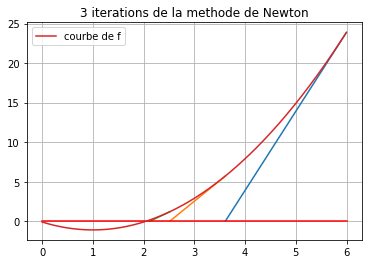

In [162]:
from scipy import misc;import matplotlib.pyplot as plt;import numpy as np
def newt(x):    return x**2-2*x-.1
valeursx=np.arange(0,6,1e-2);valeursy=map(newt,valeursx)
def newton_trace(f,x0,n):
    x=x0;l=[x]
    for i in range(n):        
        x=x-float(f(x))/misc.derivative(f,x);l.append(x)
    return l
plt.close();L=newton_trace(newt,6,3)
for i in range(3):
    plt.plot([L[i],L[i+1]],[newt(L[i]),0])
plt.grid();plt.plot([0,6],[0,0],color='red');plt.plot(valeursx,valeursy,label='courbe de f');plt.legend(loc=2);plt.title('3 iterations de la methode de Newton');plt.show()

### Hypothèses
* <b>Paramètres :</b>
    * $f\colon [a,b]\rightarrow \mathbb{R}$ dérivable
    * $x_0\in [a,b]$ ; $n\in \mathbb{N}^\star$
* <b>Sortie :</b>
    * $x_n$ t.q. $(x_0,\dots , x_n)$ résulte de la méthode de Newton
* <b>Problème :</b>    
$\rightarrow$ Dérivée $f'$ ??

### Solution 1 : Passer f' en paramètre

In [17]:
def newton1(f,g,x0,n):#g représente f'
    x=x0
    for i in range(n):
        x=x-float(f(x))/g(x)
    return x
#Exemple :
newton1(np.sin,np.cos,3,3)#Précision remarquable !
#Des la 3eme iteration

3.141592653589793

### Solution 2 : f' numérique avec Python

In [21]:
import scipy.misc 
import scipy.misc as mss
mss.derivative(np.sin,np.pi)#Horreur !

-0.8414709848078965

In [181]:
mss.derivative(np.sin,np.pi,.001)#Ouf

-0.9999998333332315

#### Application

In [22]:
def newton2(f,x0,n):
    x=x0
    for i in range(n):
        x=x-float(f(x))/mss.derivative(f,x,0.001)#avec pas 1 ?
    return x
#Exemple :
newton2(np.sin,3,3)

3.141592653589793

### Solution 3 : f' symbolique avec Python

In [184]:
import sympy
x=sympy.symbols('x')

sympy.diff(sympy.sin(x),x),sympy.sin(x).subs(x,np.pi/2)

(cos(x), 1.00000000000000)

#### Application

In [ ]:
x=sympy.symbols('x')
def newton3(fonc,x0,n):#Expression symbolique en x
    accu=x0
    expr=x-fonc/sympy.diff(fonc,x)
    for i in range(n):
        accu=expr.subs(x,accu)
    return accu
#Exemple :
newton3(sympy.sin(x),3,10)
#newton3(sympy.sin(x),3,3).evalf(10)

### Solution 4 : Produire sa propre estimation de f'
* $h>0$ 
$$ f'(x)\approx \frac{f(x+h)-f(x)}{h} \text{ ou } f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$
#### Choix de h
* h trop grand $\rightarrow$ mauvaise approximation
* h trop petit $\rightarrow$ erreur (instabilité)

In [3]:
def derive(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)
derive(np.sin,np.pi,0.01)

-0.9999833334166451

#### Application

In [4]:
h=0.01
def newton4(f,x0,n):
    x=x0
    for i in range(n):
        x=x-f(x)/derive(f,x,h)
    return x
newton4(np.sin,3,3)

3.1415926535900636

#### Raffinements : meilleures approximations de f'
* cf. méthodes de quadrature
* cf. méthodes d'intégration d'ED

Exemple : RK4
$$ f'(x_k)\approx \frac{1}{6}\left(\frac{f(x_k+\epsilon)-f(x_k)}{\epsilon}+2.\frac{f(x_k+2\epsilon)-f(x_k)}{2\epsilon}+2.\frac{f(x_k-2\epsilon)-f(x_k)}{-2\epsilon}+\frac{f(x_k-\epsilon)-f(x_k)}{-\epsilon}\right)$$ 
$$ f'(x_k)\approx =\frac{1}{6\epsilon}\left( f(x_k+\epsilon)- f(x_k+2\epsilon)- f(x_k-2\epsilon)+ f(x_k-\epsilon)\right) $$

### Méthode de la sécante
* Intégrer l'approximation de f'  
$$ f'(x_k)\approx \frac{f(x_k)-f(x_{k-1})}{x_k-x_{k-1}}
$$
* Directement dans Newton :
$$
f(x_{k+1}=x_k-\frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}f(x_k)
$$    
$\rightarrow$ $x_0$ <b>et</b> $x_1$ nécessaire

In [6]:
def secante(f,x0,x1,n):
    xplus=x1
    xmoins=x0
    for i in range(n):
        der=(f(xplus)-f(xmoins))/float(xplus-xmoins)
        xplus,xmoins=xplus-f(xplus)/der,xplus
    return xplus
secante(np.sin,3,4,3)#Encadrer le zéro

3.141592727984857

### Variantes
* Conserver trace des $x_k$

In [70]:
def newton_memo(f,x0,n):
    x=x0
    l=[x]
    for i in range(n):
        x=x-float(f(x))/mss.derivative(f,x,0.001)
        l.append(x)
    return l
newton_memo(np.sin,3,5)

[3,
 3.1425465668320522,
 3.1415926531414695,
 3.141592653589793,
 3.141592653589793,
 3.141592653589793]

### Variantes
* S'arrêter quand une précision $\epsilon$ est atteinte
* Eventuellement connaître le $n$ convenable t.q. :
$$|f(x_n)|\leq \epsilon$$

In [14]:
def newton_prec(f,x0,eps):
    x=x0
    n=0
    while abs(f(x))>eps:
        x=x-float(f(x))/mss.derivative(f,x,0.1)
        n+=1
    return x,n 
newton_prec(np.sin,3,1e-10)

(3.141592653584255, 4)

### Exemple : sqrt(2)

In [24]:
print(np.sqrt(2))
for i in range(12):
    print newton2(lambda x:x**2-2,4,i)

1.4142135623730951
4
2.25000000000039
1.5694444444444704
1.4218903638151281
1.4142342859400727
1.4142135625249321
1.4142135623730951
1.414213562373095
1.4142135623730951
1.414213562373095
1.4142135623730951
1.414213562373095


* Précision d'affichage : dès $n=6$
* Oscillations ensuite    
$\leadsto$ signe d'instabilité numérique

### Efficacité
* Convergence très rapide (cas favorables si $f$ s'annule en $z$) :
    * $f\in \mathcal{C}^2([a,b],\mathbb{R})$ + $f'$ ne s'annule pas    
    $\rightarrow$ $(x_n)$ converge vers $z$    
    $\rightarrow$ $|x_{n+1}-z|\leq K|x_n-z|^2$    
    $\leadsto$ méthode d'ordre 2
    * $f$ de surcroit convexe    
    $\rightarrow$ $(x_n)$ monotone

### Limites
* Rien n'est prouvé (terminaison, corrections) !
* Divisions par 0 éventuelles
* Résultat éventuellement éloigné d'un zéro    
$\rightarrow$ On estime <b>d'abord</b> $x_0$ proche
* Méthode instable (puits)

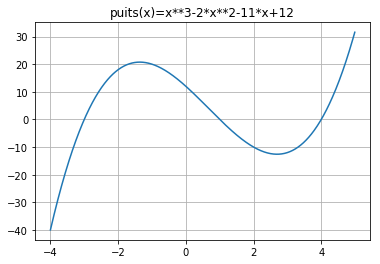

In [27]:
def puits(x):
    return x**3-2*x**2-11*x+12

import matplotlib.pyplot as plt;abscisses=np.arange(-4,5,1e-2);ordonnees=map(puits,abscisses);plt.plot(abscisses, ordonnees);plt.grid();plt.title('puits(x)=x**3-2*x**2-11*x+12')

plt.show()

In [67]:
newton2(puits,2.6942,40),newton2(puits,2.6943,40)
#newton2(puits,2.35287527,10),newton2(puits,2.35284172,10)#Pire
#newton2(puits,-4,5)
#newton2(puits,3,5)

(-157.5963117289565, 37.163286192157926)

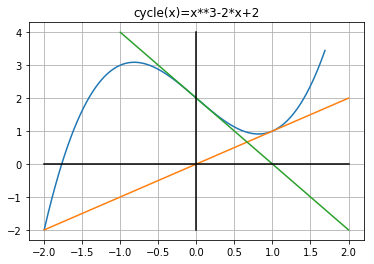

In [68]:
def cycle(x):
    return x**3-2*x+2

abscisses=np.arange(-2,1.7,1e-2);ordonnees=map(cycle,abscisses);plt.plot(abscisses, ordonnees);plt.plot([-2,2],[-2,2]);plt.plot([-1,2],[4,-2]);plt.plot([-2,2],[0,0],color='black');plt.plot([0,0],[-2,4],color='black');plt.grid();plt.title('cycle(x)=x**3-2*x+2')

plt.show()

In [72]:
newton_memo(cycle,1,10)

[1,
 9.999989726283687e-07,
 1.0000005000012337,
 3.999993242298494e-06,
 1.0000005000222156,
 4.000119251723611e-06,
 1.0000005000222156,
 4.000119251723611e-06,
 1.0000005000222156,
 4.000119251723611e-06,
 1.0000005000222156]

### Fonctions intégrées
* module $\verb"scipy"$ sous module $\verb"optimize"$
* fonctions $\verb"fsolve"$ ou $\verb"root"$
* paramètres : $f$ et $x_0$ (option $\verb"fprime="f'$)
    * <b>fsolve</b> $\leftrightarrow$ Méthode de Powell    
        $\rightarrow$ option $\verb"fprime="f'$    
        $\leadsto$ descente de gradient avec relaxation
    * <b>fsolve</b> (Centrale)    
        $\rightarrow$ option $\verb"method= 'hybr'"\text{ (defaut)},\verb"'broyden1'"\text{ (Newton)}, \verb"'krylov'",\dots$    
        $\rightarrow$ adapté aux fonctions vectorielles


In [80]:
import scipy.optimize as opt
opt.fsolve(lambda x:x**2-2,5),opt.root(lambda x:x**2-2,5)
#sol=opt.root(lambda x:x**2-2,5);sol.x
#def f(v): return [v[0]**2-v[1]**2-1,v[0]+2*v[1]-3]
#opt.root(f,[0,0]).x,opt.fsolve(f,[0,0])
#opt.root(cycle,0)
#opt.fsolve(cycle,0)

(array([1.41421356]),     fjac: array([[-1.]])
      fun: array([1.03472786e-13])
  message: 'The solution converged.'
     nfev: 10
      qtf: array([-2.0705428e-08])
        r: array([-2.82844119])
   status: 1
  success: True
        x: array([1.41421356]))

In [81]:
np.diff([3,2])

array([-1])